<a href="https://colab.research.google.com/github/Saqib-Mahmood/Naive-bayes-text-classification/blob/master/Naive_bayes_assignment2_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In Depth: Naive Bayes Classification

The previous four sections have given a general overview of the concepts of machine learning.
In this section and the ones that follow, we will be taking a closer look at several specific algorithms for supervised and unsupervised learning, starting here with naive Bayes classification.

Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets.
Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.
This section will focus on an intuitive explanation of how naive Bayes classifiers work, followed by a couple examples of them in action on some datasets.

## Bayesian Classification

Naive Bayes classifiers are built on Bayesian classification methods.
These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.
In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.
Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.
Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

We begin with the standard imports:

## Gaussian Naive Bayes

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes.
In this classifier, the assumption is that *data from each label is drawn from a simple Gaussian distribution*.
Imagine that you have the following data:

One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions.
This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution.
The result of this naive Gaussian assumption is shown in the following figure:

![(run code in Appendix to generate image)](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.05-gaussian-NB.png?raw=1)
[figure source in Appendix](06.00-Figure-Code.ipynb#Gaussian-Naive-Bayes)

The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses.
With this generative model in place for each class, we have a simple recipe to compute the likelihood $P({\rm features}~|~L_1)$ for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

This procedure is implemented in Scikit-Learn's ``sklearn.naive_bayes.GaussianNB`` estimator:

Now let's generate some new data and predict the label:

Now we can plot this new data to get an idea of where the decision boundary is:

We see a slightly curved boundary in the classifications—in general, the boundary in Gaussian naive Bayes is quadratic.

A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the ``predict_proba`` method:

The columns give the posterior probabilities of the first and second label, respectively.
If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.

Of course, the final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results.
Still, in many cases—especially as the number of features becomes large—this assumption is not detrimental enough to prevent Gaussian naive Bayes from being a useful method.

## Multinomial Naive Bayes

The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label.
Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution.
The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribuiton with a best-fit multinomial distribution.

### Example: Classifying Text

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.
We discussed the extraction of such features from text in [Feature Engineering](05.04-Feature-Engineering.ipynb); here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

Let's download the data and take a look at the target names:

#Highest information gain (Task1)
 examine the words
with highest information gain for discriminating the classes.

In [1]:

from sklearn.datasets import fetch_20newsgroups

from sklearn.feature_selection import mutual_info_classif

from sklearn.feature_extraction.text import CountVectorizer


newsgroups_train = fetch_20newsgroups(subset='train')

X, Y = newsgroups_train.data, newsgroups_train.target

cv = CountVectorizer(max_df=0.95, min_df=2, max_features=10000, stop_words='english')

X_vec = cv.fit_transform(X)

res = dict(zip(cv.get_feature_names(), mutual_info_classif(X_vec, Y, discrete_features=True)))

print(res)

{'00': 0.023686536886861908, '000': 0.022991756721298794, '005': 0.0006578756063962879, '01': 0.012263746228025361, '02': 0.009143956569775888, '02238': 0.008156252105592931, '02p': 0.0005221116716487559, '03': 0.015602691390726673, '030': 0.003923358345375681, '0358': 0.005347568791945473, '04': 0.010211410255495018, '040': 0.0058993389646262405, '0400': 0.0025051995921281083, '05': 0.010701838751555887, '06': 0.0070250048284063666, '07': 0.00515723442566331, '08': 0.006813644703569352, '09': 0.006158669607590773, '0b': 0.0029324173119316984, '0c': 0.00205665744600789, '0d': 0.004128390869045028, '0g': 0.0024919342397681545, '0i': 0.0034222614228203844, '0l': 0.004314724353588225, '0m': 0.0029876774444583076, '0p': 0.0028765787245513185, '0q': 0.0040751431242771405, '0qax': 0.0026162687464097584, '0t': 0.004456228036238524, '0tbxn': 0.002091868812218816, '0tq': 0.0023539967553852584, '0u': 0.002761652400693136, '0w': 0.0024458354416132615, '10': 0.020876014731628957, '100': 0.01142062

###10 heightest words with highest imformation gain

In [4]:
# Python program to demonstrate  
# finding 3 highest values in a Dictionary  
  
from collections import Counter 
  
# Initial Dictionary 
#my_dict = {'A': 67, 'B': 23, 'C': 45,  
 #          'D': 56, 'E': 12, 'F': 69} 
my_dict=res

k = Counter(my_dict) 
  
# Finding 3 highest values 
high = k.most_common(10)  
  
#print("Initial Dictionary:") 
#print(my_dict, "\n") 
  
  
print("Dictionary with 10 highest values:") 
print("Keys: Values") 
  
for i in high: 
    print(i[0]," :",i[1]," ")

Dictionary with 3 highest values:
Keys: Values
god  : 0.11842887420552509  
windows  : 0.11556899810588968  
people  : 0.09489496408774446  
sale  : 0.08852321297227296  
clipper  : 0.08667923282924951  
government  : 0.08652451166093075  
dod  : 0.08155877057259635  
team  : 0.08027182379256753  
car  : 0.0796989596134786  
writes  : 0.07667764961834192  


#Task2
###How accurate is Rainbow over the training set? You can command Rainbow to classify all the data in the training set

In [5]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity here, we will select just a few of these categories, and download the training and testing set:

In [0]:
train = fetch_20newsgroups(subset='train')
test = fetch_20newsgroups(subset='test')

In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.
For this we will use the TF-IDF vectorizer (discussed in [Feature Engineering](05.04-Feature-Engineering.ipynb)), and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

With this pipeline, we can apply the model to the training data, and predict labels for the test data:

In [0]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [11]:
from sklearn.metrics import classification_report
print("Classification report for sklearn of model\n\n\n\n",classification_report(test.target, labels))


Classification report for sklearn of model



               precision    recall  f1-score   support

           0       0.80      0.52      0.63       319
           1       0.81      0.65      0.72       389
           2       0.82      0.65      0.73       394
           3       0.67      0.78      0.72       392
           4       0.86      0.77      0.81       385
           5       0.89      0.75      0.82       395
           6       0.93      0.69      0.80       390
           7       0.85      0.92      0.88       396
           8       0.94      0.93      0.93       398
           9       0.92      0.90      0.91       397
          10       0.89      0.97      0.93       399
          11       0.59      0.97      0.74       396
          12       0.84      0.60      0.70       393
          13       0.92      0.74      0.82       396
          14       0.84      0.89      0.87       394
          15       0.44      0.98      0.61       398
          16       0.64      0.94 

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator.
For example, here is the confusion matrix between the true and predicted labels for the test data:

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity.
This is perhaps an expected area of confusion!

The very cool thing here is that we now have the tools to determine the category for *any* string, using the ``predict()`` method of this pipeline.
Here's a quick utility function that will return the prediction for a single string:

##accuracy

In [12]:

true = 0
for i in range(7532):
  if(labels[i] == test.target[i]):
    true = true + 1

accuracy=true/7532
print(accuracy)

0.7738980350504514


In [0]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

Let's try it out:

In [14]:
predict_category('sending a payload to the ISS')

'sci.space'

In [15]:
predict_category('discussing islam vs atheism')

'alt.atheism'

In [16]:
predict_category('determining the screen resolution')

'comp.graphics'

Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking.
Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.

## When to Use Naive Bayes

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model.
That said, they have several advantages:

- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few (if any) tunable parameters

These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification.
If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem.
If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in *every single dimension* to be close overall).
This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information.
For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.

#Task3
Plot a graph showing the test set accuracy as you vary the number
of training examples. Use training sets of size 2/100, 6/100, 20/100, and 70/100, using
the remaining examples as your test set. 


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# 0.99 means 99% test set and 1 % training set, 
# 0.3 means  30% test set and 70% training set 
test=[0.99, 0.98, 0.97, 0.96, 0.94, 0.9, 0.8, 0.7, 0.6, 0.5, 0.3]

acc=[]
for i in range(len(test)):

  dataset = fetch_20newsgroups(shuffle=True, random_state=3)
  X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=test[i], random_state=0)

  model6 = make_pipeline(TfidfVectorizer(), MultinomialNB())

  model6.fit(X_train,y_train)
  
  labels = model6.predict( X_test)
  
  true = 0
  for i in range(len(y_test)-1):
    if(labels[i] == y_test[i]):
      true = true + 1

  accuracy_2=true/len(y_test)
  acc.append(accuracy_2)

In [18]:
model6

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

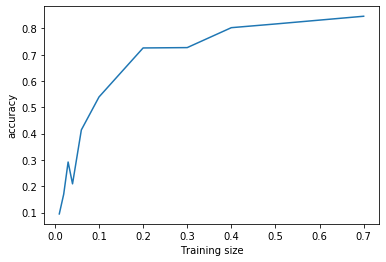

In [19]:
trains=[]
for i in range(len(test)):
  trains.append(1-test[i])
import matplotlib.pyplot as plt
plt.plot(trains, acc)
plt.ylabel('accuracy')
plt.xlabel('Training size')
plt.show()